In [2]:
import cv2
from tensorflow.keras.models import model_from_json
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

In [28]:
#functions
def mask_map(val):
  label_dict = {'without_mask':[1,0],'with_mask':[0,1]}
  for key in label_dict:
    if (label_dict[key]==val).all():
      output = key
  return output

#import model
with open(r'C:\Edureka_AI_ML_course\Test_1\mask_detector_model\CNN_model_config.json') as json_file:
    json_config = json_file.read()
model = model_from_json(json_config)
model.load_weights(r'C:\Edureka_AI_ML_course\Test_1\mask_detector_model\CNN_mask_detector_weights.h5')

#Video Capture
video=cv2.VideoCapture(0)
a = 1
display_image = 0
while True:
    a=a+1
    check, frame = video.read()
    face_cascade = cv2.CascadeClassifier(r'C:\Edureka_AI_ML_course\Test_1\haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,3)
    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        resized_image = cv2.resize(gray[y-5:y+h+5,x-5:x+h+5],(100,100),cv2.INTER_AREA)
        cv2.rectangle(frame, (x, y), (x+w,y+h), (0, 255, 255), 2)
        prediction_prob = model.predict(resized_image.reshape(1,100,100,1))
        mask_status = mask_map(np.round_(prediction_prob))
        if(mask_status=='with_mask'):
            text = mask_status+': '+str(prediction_prob[0][1])
        else:
            text = mask_status+': '+str(prediction_prob[0][0])
        cv2.putText(frame,text,(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv2.LINE_AA)            
    # Display the output
    cv2.imshow('capturing',frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        display_image = frame
        break

print(a) 
video.release()
cv2.destroyAllWindows()

173


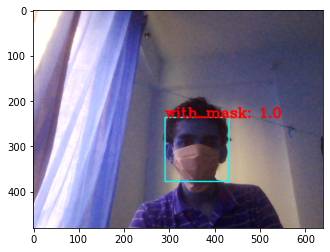

In [29]:
plt.imshow(display_image)